In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
def count(file):
    letter_count = {}
    for letter in letter_count:
        if letter.isalpha():

            letter = letter.lower()
            if letter in letter_count:
                letter_count[letter] += 1
            else:
                letter_count[letter] = 1
    return letter_count

In [3]:
def count_next(file):
    next_count={}
    file = file.lower()
    letters = re.findall(r'[a-z]', file) 
    for i in range(len(letters)-1):
        current_letter = letters[i]
        next = letters[i + 1]
        
        if current_letter in next_count:
            
            if next in next_count[current_letter]:
                next_count[current_letter][next] +=1
            
            else:
                next_count[current_letter][next] =1
            
        else:
            next_count[current_letter]= {next:1}
    return next_count


In [4]:
def percent(count_next):
    percentages = {}
    for letter, x in count_next.items():
        total = sum(x.values())
        percentages[letter] = {n: c / total * 100 for n,c in x.items()}
    return percentages

In [5]:
with open("data.txt", "r") as f:
    data=f.read()


l_count = count(data)
next_count = count_next(data)
perc = percent(next_count)
print(perc)

{'l': {'o': 10.094229669701368, 'i': 21.99003826362317, 'l': 15.987707261292167, 'e': 15.664995381976516, 'a': 13.331244227470643, 't': 4.121585961208603, 'u': 15.110282798962043, 'c': 0.5602102300215508, 'p': 0.6602674055504244, 'd': 0.4502572898799314, 'h': 0.13249329287065137, 'q': 0.16273035140959669, 's': 0.6085895236838633, 'v': 0.3260104675199015, 'n': 0.2858776443682104, 'x': 0.0703698816906364, 'm': 0.141839292782689, 'g': 0.061023881778598764, 'y': 0.08356423450763073, 'f': 0.06652152878567973, 'b': 0.06707129348638782, 'r': 0.023090117429740074}, 'o': {'r': 14.504219113565641, 'l': 7.846710212777887, 'n': 21.28227411622887, 's': 10.587031482156375, 'd': 7.058394774466653, 'm': 8.083036640408174, 'c': 4.622802837038491, 'f': 1.4277704577948473, 'i': 2.712847971741751, 'q': 2.626503322026296, 'a': 1.7969779372599592, 'e': 1.9612570435367664, 'v': 1.4417874463850187, 't': 4.037453393512937, 'p': 5.090970255950212, 'b': 2.5090409576406603, 'g': 1.436741330492557, 'h': 0.26127666

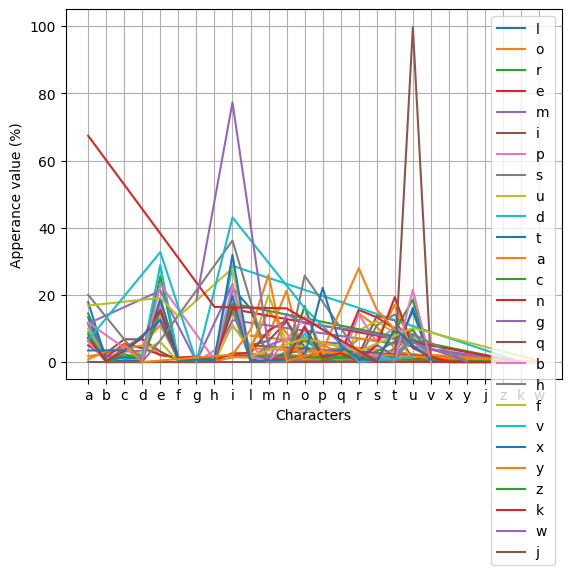

In [6]:
for letter, nextletterperc in perc.items():
    next_letters, percentages = zip(*sorted(nextletterperc.items()))
    plt.plot(sorted(next_letters), percentages, label=f"{letter.lower()}")


plt.ylabel("Apperance value (%)")
plt.xlabel("Characters")
plt.legend()
plt.grid()
plt.show()